In [21]:
import sys
sys.path.append('../../../') # Add the root directory to sys.path

In [22]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix

In [23]:
test_dir = '../../../data/Gaia DR3/test.parquet'
data = pd.read_parquet(test_dir)
data

,source_id,teff_gspphot,logg_gspphot,mh_gspphot,spectraltype_esphs,Cat,flux
0,2270162933477596928,5793.526855,4.2239,-0.2202,F,LM,"[2.1406083e-17, 1.36527624e-17, 8.9983064e-18,..."
1,5595563490086213760,16123.186523,4.1203,-0.9216,B,LM,"[5.743483e-16, 5.6371223e-16, 5.316359e-16, 5...."
2,2062156877074076544,33753.062500,4.1338,-0.9648,B,M,"[9.540365e-16, 9.370028e-16, 8.942922e-16, 8.6..."
3,2266614878173081216,6153.653809,4.0231,-0.6670,F,LM,"[4.3227304e-17, 3.599028e-17, 3.1161376e-17, 3..."
4,2005083633660968704,16388.207031,3.7014,-0.0590,B,M,"[1.1341707e-15, 1.1049582e-15, 1.0222559e-15, ..."
...,...,...,...,...,...,...,...
3521,2263579951202517120,5750.221191,4.2642,-0.1881,G,LM,"[2.4816538e-17, 2.2245785e-17, 2.0786124e-17, ..."
3522,4094753787724436480,17691.224609,3.3499,0.2152,B,M,"[2.1005067e-14, 2.1114124e-14, 1.9657805e-14, ..."
3523,2268895780684642048,5785.978027,4.1548,-0.1405,G,LM,"[4.950771e-17, 4.735013e-17, 4.7743644e-17, 4...."
3524,5524705188351695744,22477.400391,3.7834,0.0073,B,M,"[4.0475476e-14, 4.102307e-14, 3.6672142e-14, 3..."


In [24]:
df = data.drop(columns = ['teff_gspphot', 'logg_gspphot', 'mh_gspphot', 'spectraltype_esphs'])
df.head()

,source_id,Cat,flux
0,2270162933477596928,LM,"[2.1406083e-17, 1.36527624e-17, 8.9983064e-18,..."
1,5595563490086213760,LM,"[5.743483e-16, 5.6371223e-16, 5.316359e-16, 5...."
2,2062156877074076544,M,"[9.540365e-16, 9.370028e-16, 8.942922e-16, 8.6..."
3,2266614878173081216,LM,"[4.3227304e-17, 3.599028e-17, 3.1161376e-17, 3..."
4,2005083633660968704,M,"[1.1341707e-15, 1.1049582e-15, 1.0222559e-15, ..."


In [25]:
test_dir = '../../../data/Gaia DR3/lm_test.parquet'
df_lm = pd.read_parquet(test_dir)
df_lm

,source_id,flux,Cat
0,2263623450631337088,"[2.4380569e-15, 2.2388932e-15, 2.0208773e-15, ...",LM
1,2263623484991072128,"[9.080353e-17, 7.900905e-17, 7.354385e-17, 7.6...",LM
2,2263625031179532800,"[4.1279026e-17, 3.6907568e-17, 3.8073304e-17, ...",LM
3,2263625649654599424,"[3.0394444e-17, 2.6702259e-17, 2.3652267e-17, ...",LM
4,2263626199410391424,"[5.687641e-18, 8.438833e-18, 6.6333053e-18, 4....",LM
...,...,...,...
9995,5937230333203165184,"[1.0422611e-17, 5.7810714e-18, 7.973631e-18, 1...",LM
9996,5937230475017452800,"[8.530493e-18, 4.4032483e-18, 5.1326193e-18, 6...",LM
9997,5937230509377200896,"[-1.3219708e-18, -2.2574377e-19, 2.4484513e-18...",LM
9998,5937230612456421888,"[2.8983347e-17, 2.3871746e-17, 2.0493077e-17, ...",LM


In [26]:
final_df = pd.concat([df, df_lm]).reset_index(drop=True)
final_df

,source_id,Cat,flux
0,2270162933477596928,LM,"[2.1406083e-17, 1.36527624e-17, 8.9983064e-18,..."
1,5595563490086213760,LM,"[5.743483e-16, 5.6371223e-16, 5.316359e-16, 5...."
2,2062156877074076544,M,"[9.540365e-16, 9.370028e-16, 8.942922e-16, 8.6..."
3,2266614878173081216,LM,"[4.3227304e-17, 3.599028e-17, 3.1161376e-17, 3..."
4,2005083633660968704,M,"[1.1341707e-15, 1.1049582e-15, 1.0222559e-15, ..."
...,...,...,...
13521,5937230333203165184,LM,"[1.0422611e-17, 5.7810714e-18, 7.973631e-18, 1..."
13522,5937230475017452800,LM,"[8.530493e-18, 4.4032483e-18, 5.1326193e-18, 6..."
13523,5937230509377200896,LM,"[-1.3219708e-18, -2.2574377e-19, 2.4484513e-18..."
13524,5937230612456421888,LM,"[2.8983347e-17, 2.3871746e-17, 2.0493077e-17, ..."


In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13526 entries, 0 to 13525
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source_id  13526 non-null  object
 1   Cat        13526 non-null  object
 2   flux       13526 non-null  object
dtypes: object(3)
memory usage: 317.1+ KB


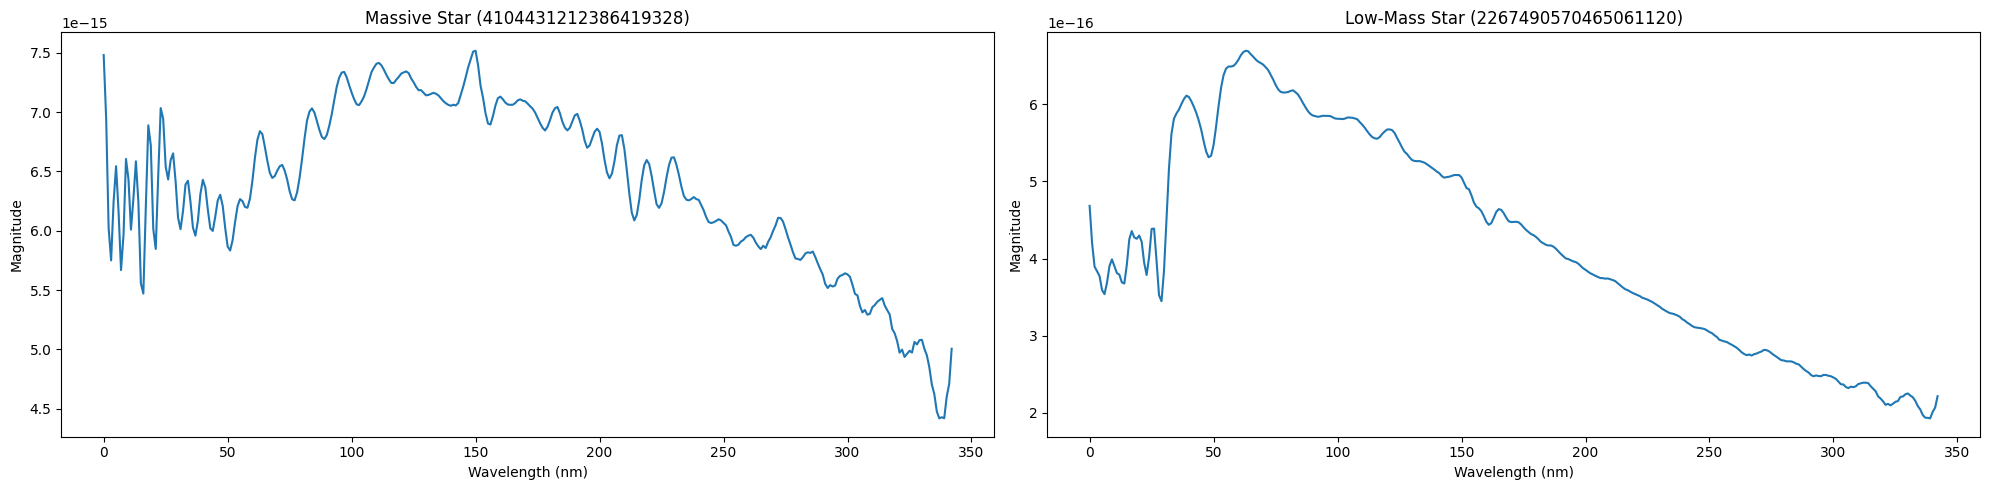

In [28]:
# rerun this cell to see random examples of different spectra


# Random sample from 'M' category (massive star)
sample_ms = final_df[final_df['Cat'] == 'M'].sample(n=1).index
flux_ms = final_df['flux'].iloc[sample_ms].values[0]
object_id_ms = final_df['source_id'].iloc[sample_ms].values[0]

# Random sample from 'LM' category (low-mass star)
sample_lm = final_df[final_df['Cat'] == 'LM'].sample(n=1).index
flux_lm = final_df['flux'].iloc[sample_lm].values[0]
object_id_lm = final_df['source_id'].iloc[sample_lm].values[0]

plt.figure(figsize=(20, 5))

# Plot for 'M' category (massive star)
plt.subplot(1, 2, 1)
plt.plot(flux_ms)
plt.title(f"Massive Star ({object_id_ms})")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude')

# Plot for 'LM' category (low-mass star)
plt.subplot(1, 2, 2)
plt.plot(flux_lm)
plt.title(f"Low-Mass Star ({object_id_lm})")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


In [29]:
num_samples = final_df.shape[0]
spectrum_width = len(final_df['flux'][0])

num_samples_lm = final_df['Cat'].value_counts()['LM']
num_samples_m = final_df['Cat'].value_counts()['M']
num_classes = final_df['Cat'].nunique()

print("Number of total spectral samples:", num_samples)
print("Number of bins in each spectra:", spectrum_width)
print("In the dataset, we have", num_samples_lm, "spectra for low mass stars and", num_samples_m, "spectra for high mass stars.")

Number of total spectral samples: 13526
Number of bins in each spectra: 343
In the dataset, we have 12206 spectra for low mass stars and 1320 spectra for high mass stars.


In [30]:
X = final_df['flux'].to_numpy()
y = final_df['Cat'].to_numpy()

# encode categories to int
y = torch.from_numpy(np.where(y == 'M', 1, np.where(y == 'LM', 0, y)).astype(float))

# L2 normalization
X = torch.from_numpy(np.array([spectrum / np.linalg.norm(spectrum, keepdims=True) for spectrum in X])).float()

In [112]:
def add_noise(spectra, noise_type='gaussian', level=0.005):
    if noise_type == 'gaussian':
        noise = np.random.normal(0, level, spectra.shape)
    elif noise_type == 'poisson':
        noise = np.random.poisson(spectra * level) / level - spectra
    elif noise_type == 'salt_pepper':
        noise = np.zeros(spectra.shape)
        salt = np.random.random(spectra.shape) < level/2
        pepper = np.random.random(spectra.shape) < level/2
        noise[salt] = 1
        noise[pepper] = -1
    return spectra + noise

def noisy_batch(X, noise_prob=1.0, **noise_params):
    mask = np.random.random(len(X)) < noise_prob
    X_noisy = X.copy()
    X_noisy[mask] = add_noise(X[mask], **noise_params)
    return X_noisy

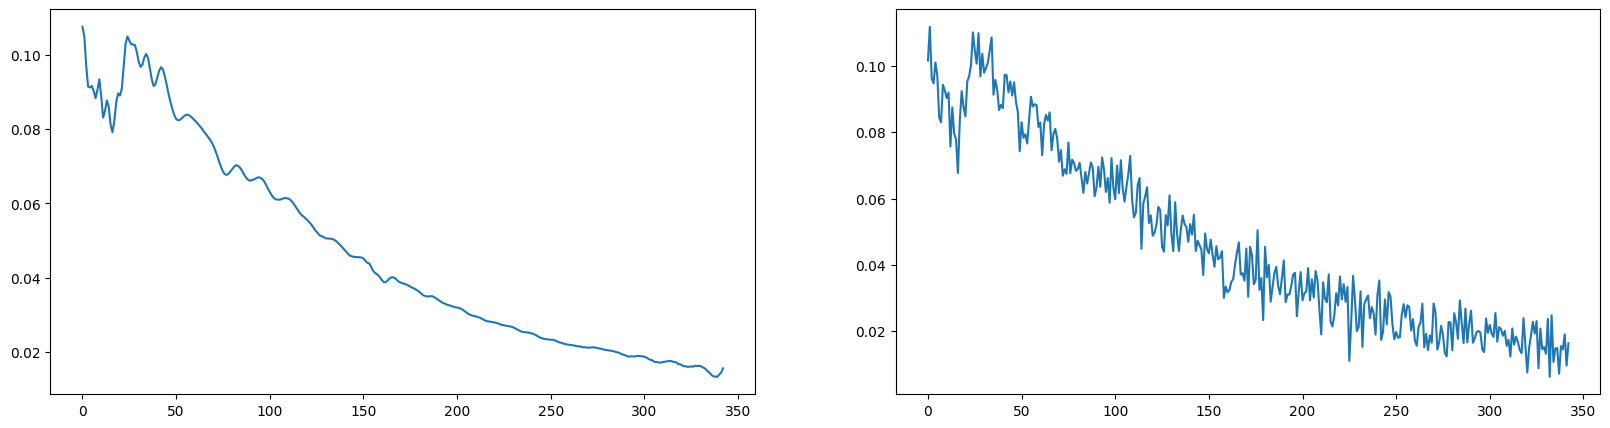

In [113]:
X_noisy = noisy_batch(np.array(X))

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(X[4])
plt.subplot(1,2,2)
plt.plot(X_noisy[4])

plt.show()

In [114]:
smote = SMOTE(random_state=42)

X_new, y_new = smote.fit_resample(X_noisy, y)

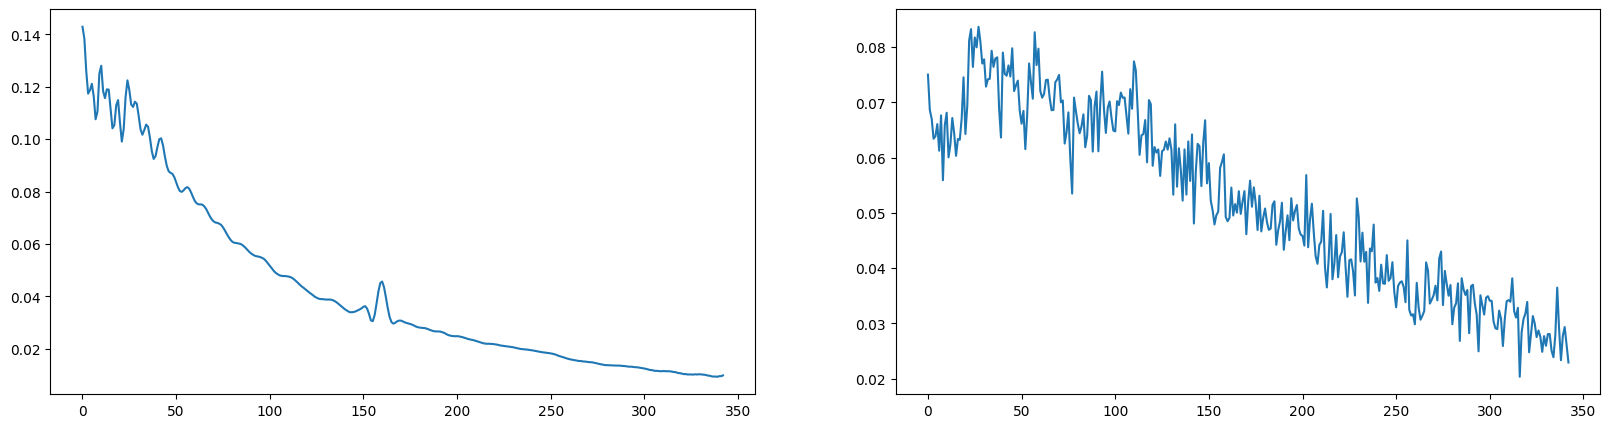

In [115]:
one_indices = np.where(y == 1.)[0]
random_index = np.random.choice(one_indices)

one_indices_new = np.where(y_new == 1.)[0]
random_index_new = np.random.choice(one_indices_new)

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.plot(X[random_index])

plt.subplot(1,2,2)
plt.plot(X_new[random_index_new])

plt.show()

In [116]:
def predict(model, X, y, verbose=True):
    
    # hyperparameters
    device = 'cuda'
    
    for m in model:
        # move everything to gpu
        m.to(device)
        X = X.to(device)
        y = y.to(device).unsqueeze(1)
        
        # metrics
        accuracy = 0

        m.eval()
        preds, probs = [], []

        with torch.no_grad():
            
            output = m(X.unsqueeze(1))

            prob = torch.sigmoid(output)
            pred = torch.round(prob).cpu().numpy().astype(float)  # pred: [batch_size]
            
            preds.extend(pred)
            probs.extend(prob.cpu().numpy())

        accuracy = accuracy_score(y.cpu().numpy(), preds)
        ra_score = roc_auc_score(y.cpu().numpy(), probs)
        f1 = f1_score(y.cpu().numpy(), preds)
        cm = confusion_matrix(y.cpu().numpy(), preds)
        
        return accuracy, ra_score, f1, cm

In [117]:
model = torch.load('../../trained_models/cnn_ensemble.pth')

accuracy, auc_score, f1, cm = predict(model, torch.from_numpy(X_new).float(), torch.from_numpy(y_new).float())

single_input = X[0].unsqueeze(0).unsqueeze(1)

Accuracy: 0.9737
AUC score: 0.9958
F1 score: 0.9736


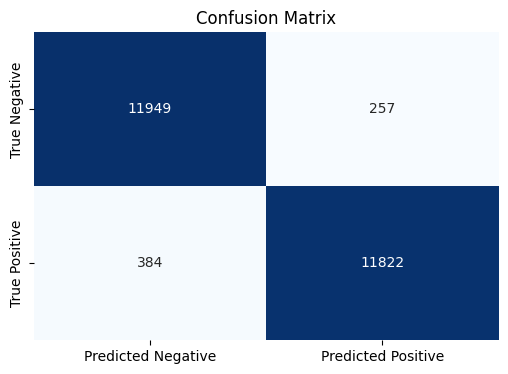

In [118]:
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC score: {auc_score:.4f}")
print(f"F1 score: {f1:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.title('Confusion Matrix')
plt.show()